<a href="https://colab.research.google.com/github/MohanVishe/Supervised-ML--Regression----Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : <font color='red'>Predicting sales of a major store chain Rossmann</font>
# <font color='green'>Problem Description</font>
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# <font color='Green'>Data Description</font>

### Files
Rossman Store Data.csv = Historical data Including Sales 

(https://drive.google.com/file/d/15uo3JVFdAEItSBZ0bTlrJg4OgvFWg99l/view?usp=share_link)

store.csv=supplemental information about the stores

(https://drive.google.com/file/d/1BCBVnJThR2XUMOofdCz9S-wJuld7puBj/view?usp=share_link)

### Information About Features

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

1. Id - an Id that represents a (Store, Date) duple within the test set
2. Store - a unique Id for each store
3. Sales - the turnover for any given day (this is what you are predicting)
4. Customers - the number of customers on a given day
5. Open - an indicator for whether the store was open: 0 = closed, 1 = open
6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
8. StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
9. CompetitionDistance - distance in meters to the nearest competitor store
10. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
11. Promo - indicates whether a store is running a promo on that day
12. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
13. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
14. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### <font color='Green'>Businesss Problem</font>

Client interest and demand for product changes with time.  Which is important for growing business. Sales prediction is estimating the demand for a service or product for a particular time. This project contains real-world business problem 
of sales predicting with the help of machine learning models.

Our task is to predict sales and find important factors affecting demand to improve sales.

# <font color='green'>Data Collection</font>

### IMPORTING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [ ]:
df1=pd.read_csv("//content/drive/MyDrive/Projects/ Supervised ML Regression (Retail Sales Prediction)/Rossmann Stores Data.csv")

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Projects/ Supervised ML Regression (Retail Sales Prediction)/store.csv")

In [ ]:
print("Row and Columns are ", df1.shape)
print("_"*100)
df1.head(3)

Row and Columns are  (1017209, 9)
____________________________________________________________________________________________________


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [ ]:
print("Row and Columns are ", df2.shape)
print("_"*200)
df2.head(3)

Row and Columns are  (1115, 10)
________________________________________________________________________________________________________________________________________________________________________________________________________


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


# <font color='Green'>Data Preprocessing</font>

(https://www.v7labs.com/blog/data-preprocessing-guide)

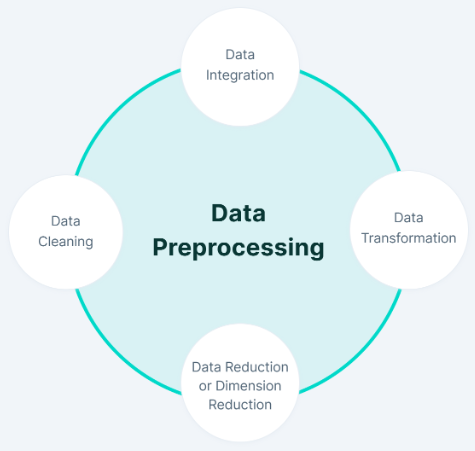

##  <font color='Green'>A. Data Cleaning</font>

### <font color='red'>1. Dealing with Null/Missing values</font>
(https://www.folkstalk.com/tech/find-columns-with-missing-values-pandas-with-code-examples/)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Convet into datetime
df1["Date"]=pd.to_datetime(df1["Date"])
# Adding month day year columns
df1["Day"]=df1["Date"].dt.day
df1["Month"]=df1["Date"].dt.month
df1["Year"]=df1["Date"].dt.year

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###  <font color='orange'>Insights</font>

* There is presence of null values in dataset
* Categorical as well as numerical data is present in the dataset.

In [ ]:
Colm_Miss=list()
for i in df2.columns:

  # find Precentage of null values presing in features
  
  if df2[i].isnull().sum() > 0:
    print(i,":",df2[i].isnull().sum()*100/len(df2),"%")
    Colm_Miss.append(i)

CompetitionDistance : 0.26905829596412556 %
CompetitionOpenSinceMonth : 31.748878923766817 %
CompetitionOpenSinceYear : 31.748878923766817 %
Promo2SinceWeek : 48.789237668161434 %
Promo2SinceYear : 48.789237668161434 %
PromoInterval : 48.789237668161434 %


#### 1. distribution `CompetitionDistance`

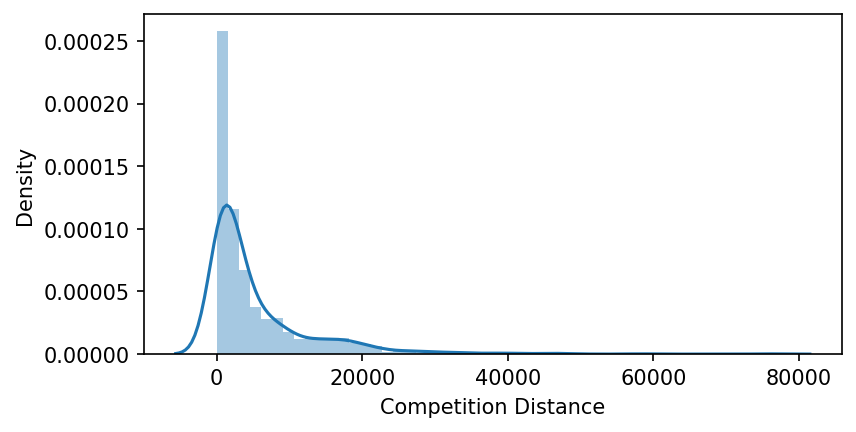

In [ ]:
# distribution Competition Distance
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

plt.rcParams.update({'figure.figsize':(6,3),'figure.dpi':150})
sns.distplot(x=df2['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance')
plt.show()

### <font color='orange'>Insights</font>
---
* There is only one numerica feature `CompetitionDistance` with missing values which contain less than 1% of missing data and the distribution is skewed towards the right and Median has resistance to outliers .

*  The categorical features `Promo2SinceWeek Promo2SinceYear PromoInterval` contain around 48.8% of missing data which is very high 
*  So we cant drop the rows we have drop the feature , If the features 
are important we can replace them with mode or make the missing 
value as different category.
* `CompetitionOpenSinceMonth CompetitionOpenSinceYear` this two features have around 31.78 % of missing values.
---

#### filling `CompetitionDistace` with <font color='red'>Median</font> values 

In [ ]:
df2["CompetitionDistance"]=df2["CompetitionDistance"].fillna(df2["CompetitionDistance"].median())

In [ ]:
df2["CompetitionDistance"].isnull().any()

False

In [ ]:
Colm_Miss.remove("CompetitionDistance")

####  1. Checking Unique values For Features

In [ ]:
#  Seperate numerical and categorical columns
# (https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical)

Colm = set(df2.columns)
# Numerical data contain Columns 
# (https://www.folkstalk.com/2022/10/pandas-get-numeric-columns-with-code-examples.htmll)
Num_Colm= set(df2._get_numeric_data())

Cat_Colm= Colm-Num_Colm

print("Categorical Columns are",Cat_Colm)

Categorical Columns are {'Assortment', 'StoreType', 'PromoInterval'}


In [ ]:
for i in Colm_Miss:
  print('\033[91m' , i , '\033[0m')
  print(df2[i].unique())

 CompetitionOpenSinceMonth 
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
 CompetitionOpenSinceYear 
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
 Promo2SinceWeek 
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
 Promo2SinceYear 
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
 PromoInterval 
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


#### Replacing with <font color='red'>Mode </font>values

In [ ]:
for i in Colm_Miss:
  df2[i].fillna(df2[i].mode()[0], inplace = True)

In [ ]:
#check
df2[Colm_Miss].isnull().sum()

CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

 ### <font color='Red'> 3. Removing outliers :</font> Using Boxplot for visualization


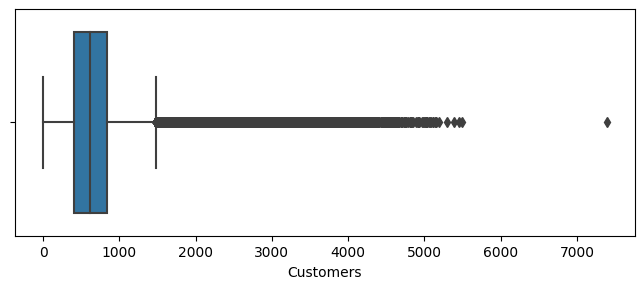

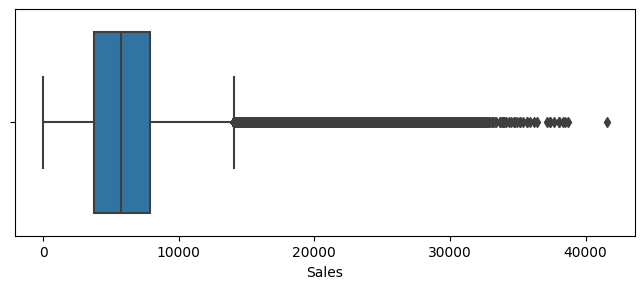

In [ ]:
# (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
plt.rcParams.update({'figure.figsize':(8,3),'figure.dpi':100})


for i in list({"Customers","Sales"}):
  
  sns.boxplot(x=i,data=df1)
  plt.show()
  

### <font color='orange'>Insights</font>
---
* As Increase in sales can cause by increse advertising ,offers and festivals etc . So sales and cutomers can be high seach case
* We can reduce the effect of outliers by feature transformation
---

##  <font color='Green'>B. Data Integration</font>

In [ ]:
# Using Merge as we want to join the columns with outer join
#(https://pandas.pydata.org/docs/user_guide/merging.html)

Sales = pd.merge(df1,df2, how="outer",on="Store")

In [ ]:
print("Number of rows and columns for new dataframe is", Sales.shape)
print("_" * 200)
Sales.head(3)

Number of rows and columns for new dataframe is (1017209, 21)
________________________________________________________________________________________________________________________________________________________________________________________________________


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,2015,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,5020,546,1,1,0,1,30,...,2015,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,4782,523,1,1,0,1,29,...,2015,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


##  Univariated Analysis

In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Day                        1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Year                       1017209 no

In [ ]:
Sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Day', 'Month', 'Year', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### **Categorical Features**

In [ ]:
# '\033[91m' for colour red and'\033[0m' to end colour
# (https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python)

for i in list(set(Sales.columns)-{"Store","Date","CompetitionDistance","Sales","Customers"}):
  print('\033[91m' , i , '\033[0m')
  print(Sales[i].unique())

 Open 
[1 0]
 Day 
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]
 Assortment 
['a' 'c' 'b']
 CompetitionOpenSinceYear 
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
 Promo2SinceYear 
[2011. 2010. 2012. 2009. 2014. 2015. 2013.]
 Month 
[ 7  6  5  4  3  2  1 12 11 10  9  8]
 StateHoliday 
['0' 'a' 'b' 'c' 0]
 PromoInterval 
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
 Promo 
[1 0]
 SchoolHoliday 
[1 0]
 Promo2SinceWeek 
[14. 13.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35. 23.
 48. 36. 50. 44. 49. 28.]
 Year 
[2015 2014 2013]
 CompetitionOpenSinceMonth 
[ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
 DayOfWeek 
[5 4 3 2 1 7 6]
 Promo2 
[0 1]
 StoreType 
['c' 'a' 'd' 'b']


 ### <font color='Red'>3. At "StateHoliday" there were some entry of 0 as string and as integer so make them all integer</font>





In [ ]:
Sales["StateHoliday"] = Sales["StateHoliday"].replace("0",0)

In [ ]:
Sales["StateHoliday"].unique()

array([0, 'a', 'b', 'c'], dtype=object)

#  <font color='Green'>Exploratory Data Analysis</font>

* With the help of exploratory data analysis we will find the trends and patterns in the data and make our conclusion
* We will use matplotlib,Seaborn for visualization and pandas to explore data




## `Hypothesis`

1. Promotion will leads to increse in sales
2. Weekend the sales would be low as stores will be closed
3. Holidays will leads to decrese in sales
4. The number of customers will positively correlated with sales
5. Sales will be zero when stores are closed


#### Value Count (Categorical Features)

0    629129
1    388080
Name: Promo, dtype: int64


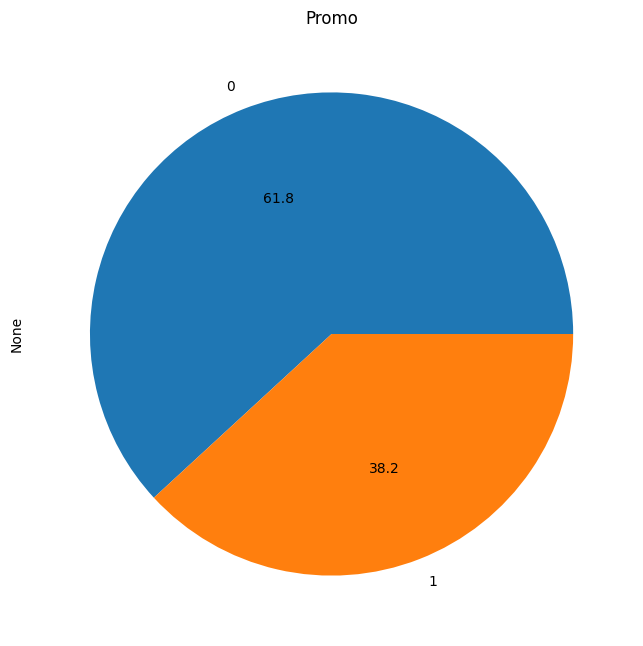

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
1    509178
0    508031
Name: Promo2, dtype: int64


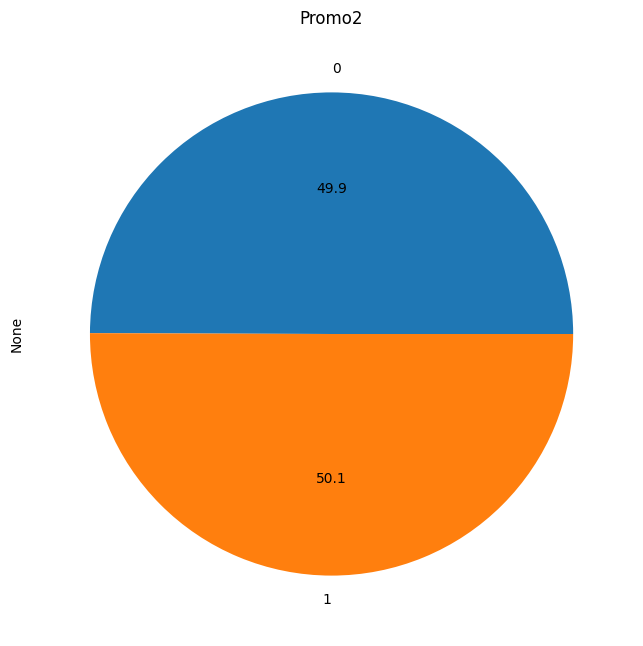

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64


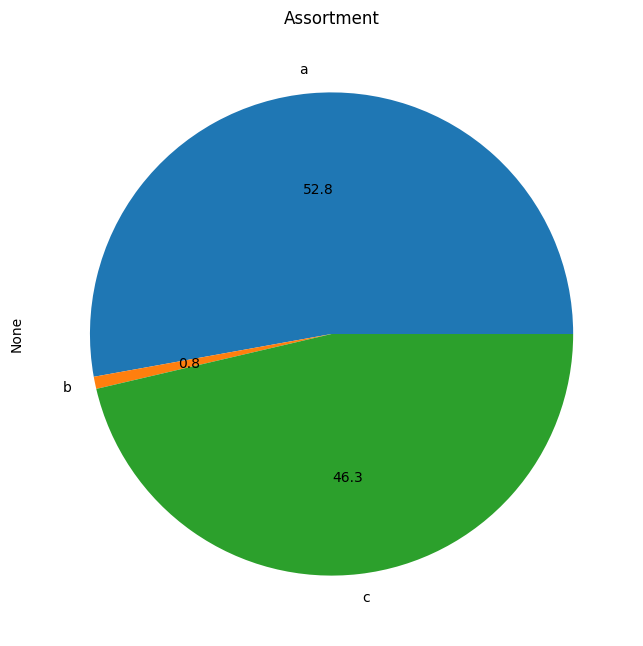

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
0    835488
1    181721
Name: SchoolHoliday, dtype: int64


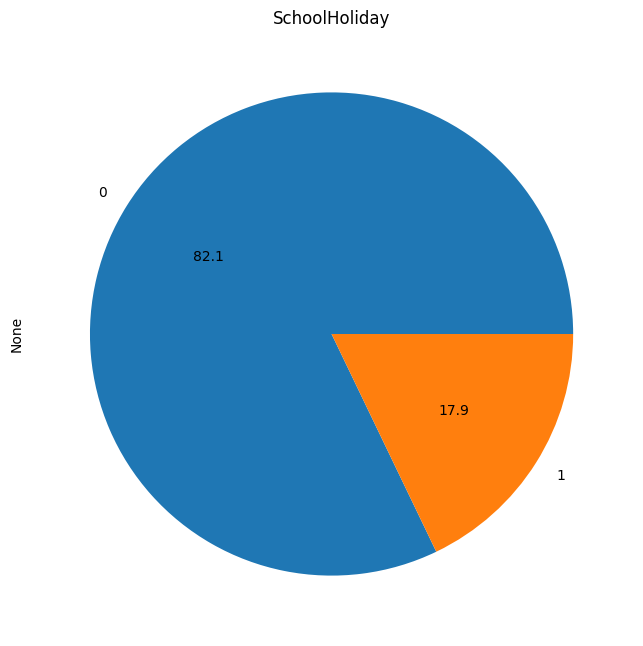

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64


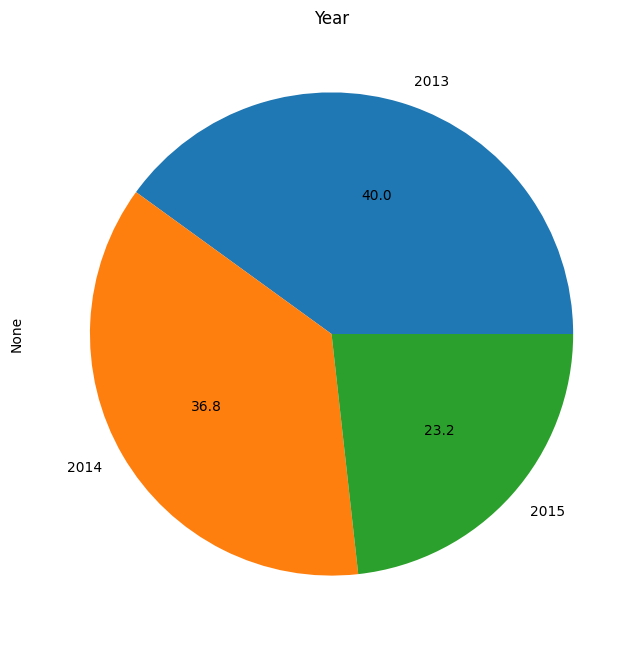

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
1    844392
0    172817
Name: Open, dtype: int64


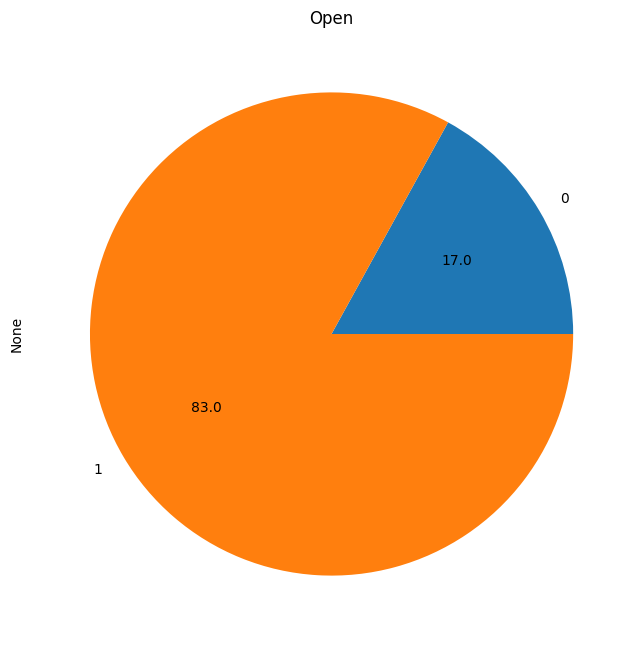

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


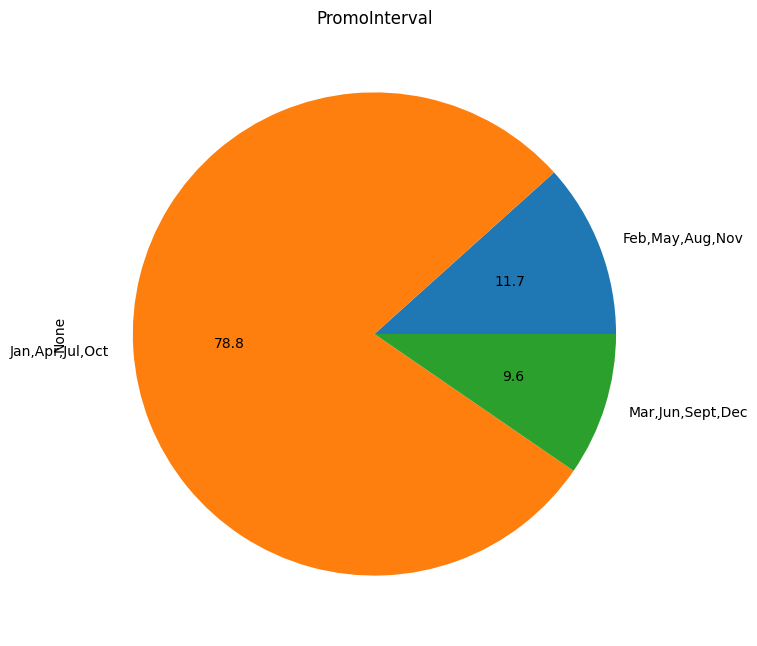

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


In [ ]:
for i in set(Sales.columns):

  #cant visualize large number of categories
  if len(Sales[i].unique()) > 3:
    continue
  plt.rcParams.update({'figure.figsize':(8,8),'figure.dpi':100}) 
  Sales.groupby(i).size().plot(kind='pie',autopct='%.1f')
  print(Sales[i].value_counts())
  plt.title(i)
  
  plt.show()
  print("\033[91m = \033[0m" * 30)


### <font color='orange'>Insights</font>
---
* 38.2 % data has promotion involved 
* 54.2% data is of store type "a" 
* 17% data is of closed stores 

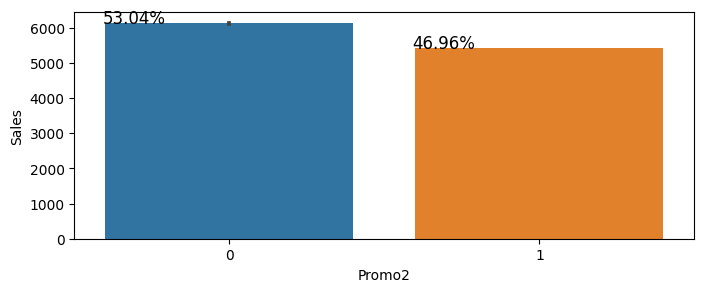

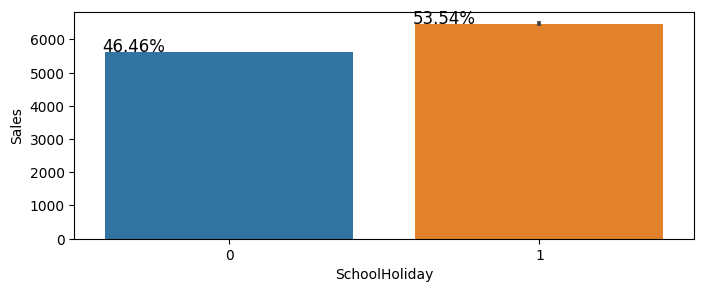

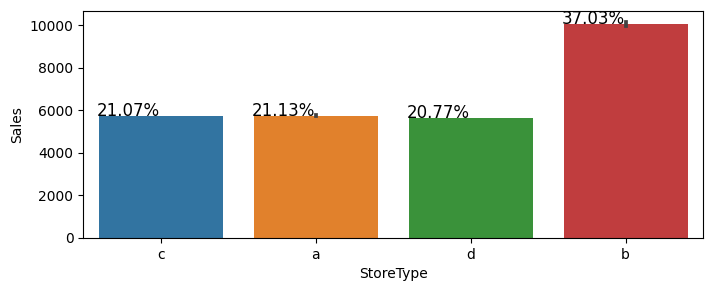

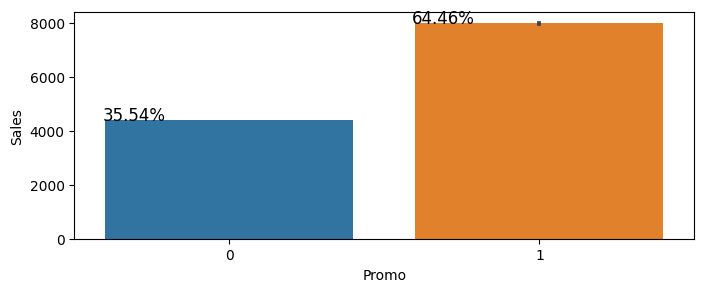

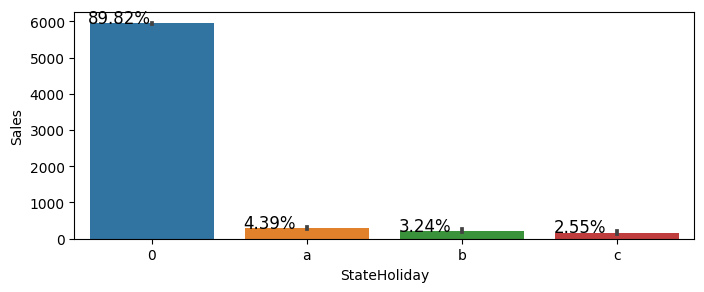

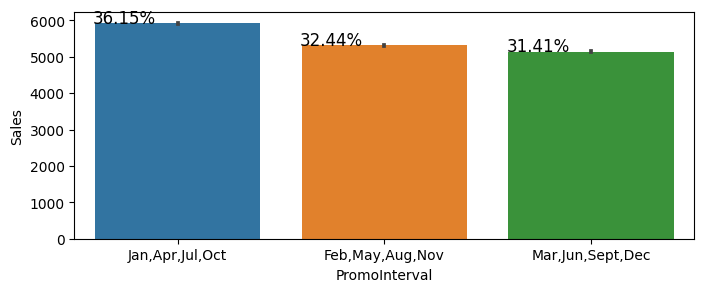

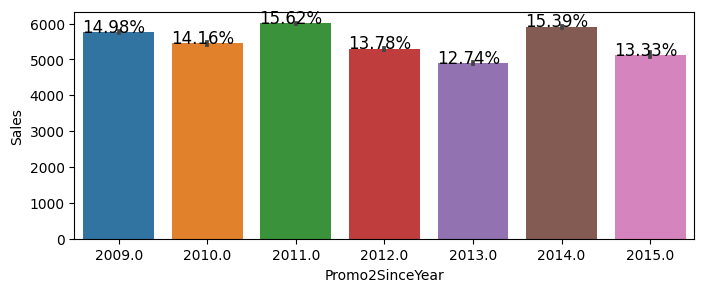

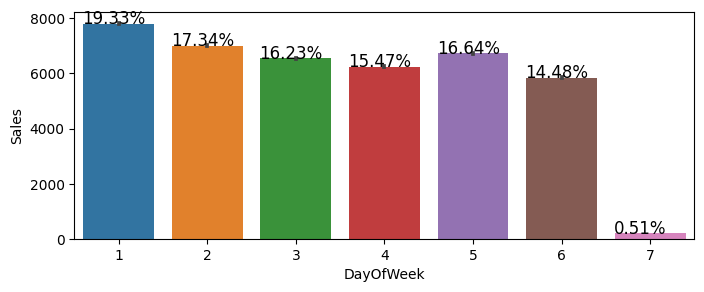

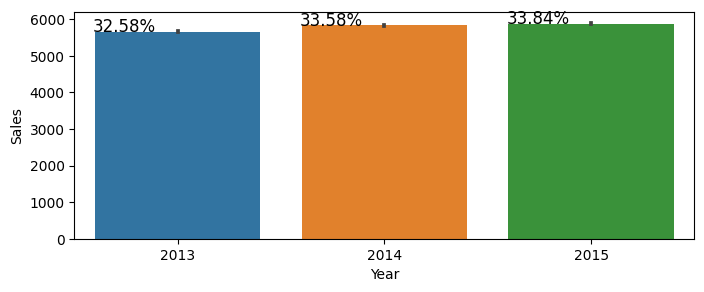

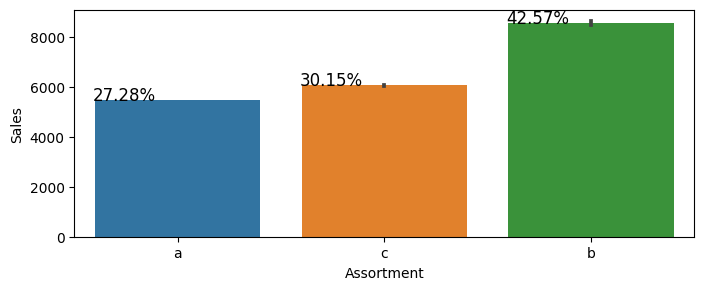

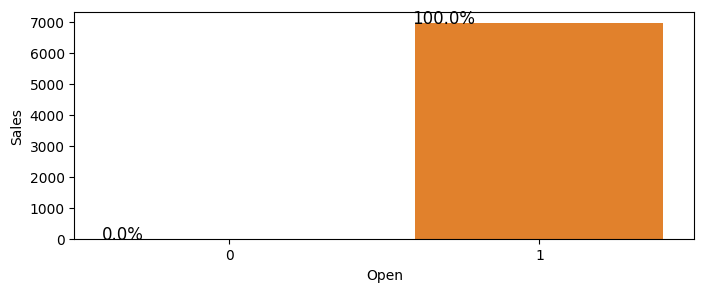

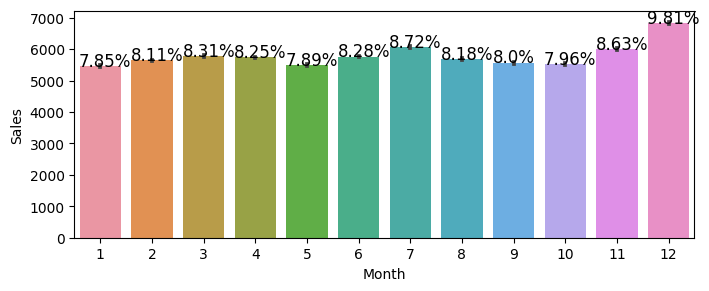

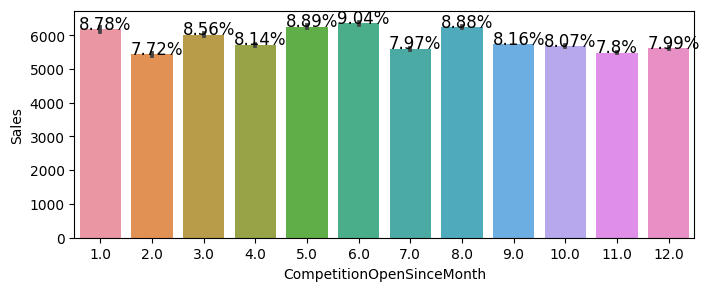

In [ ]:
for i in set(Sales.columns):
  plt.rcParams.update({'figure.figsize':(8,3),'figure.dpi':100}) 
  #cant visualize large number of categories
  if len(Sales[i].unique()) > 15:
    continue
  ax = sns.barplot(x=Sales[i], y=Sales['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()
  

### <font color='orange'>Insights</font>
---
* Shopes are closed at sunday so the sales are lowest due to which 
the monday has slightly increase in sales
* Normally many stores are closed on state holiday which leads to decrease in sales
* On school holiday the sales are increased
* Its obvious that the sales are when stores are open we have to remove 
data containing the store closed
* Store type B has highest sales and promotion increases the sales.


### Checking Distribution of Numerical features

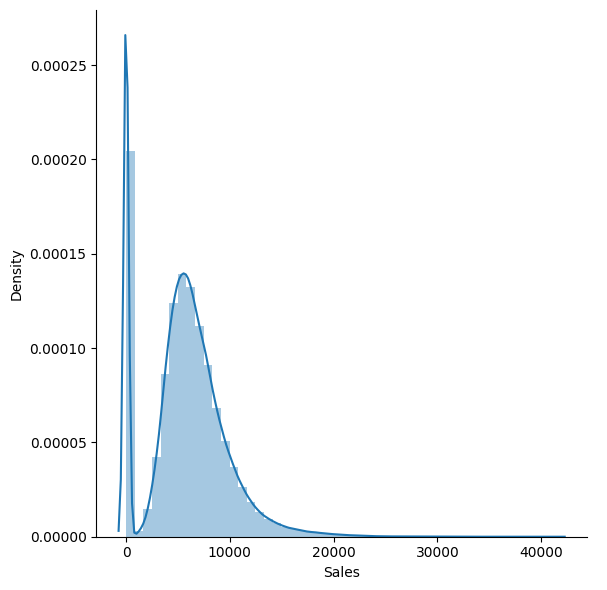

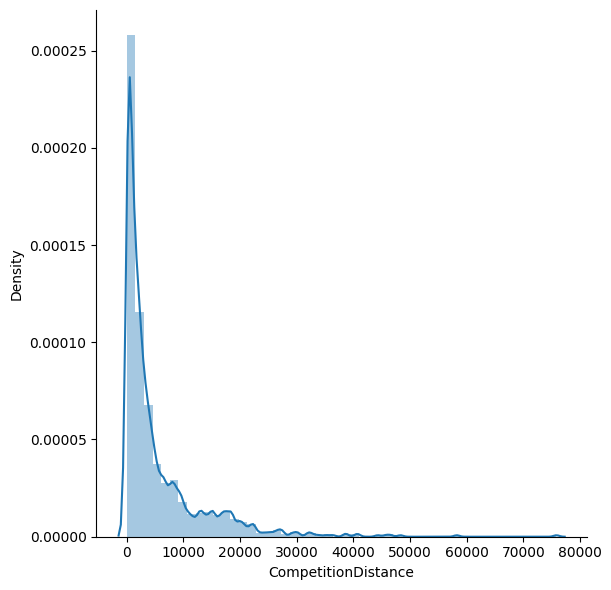

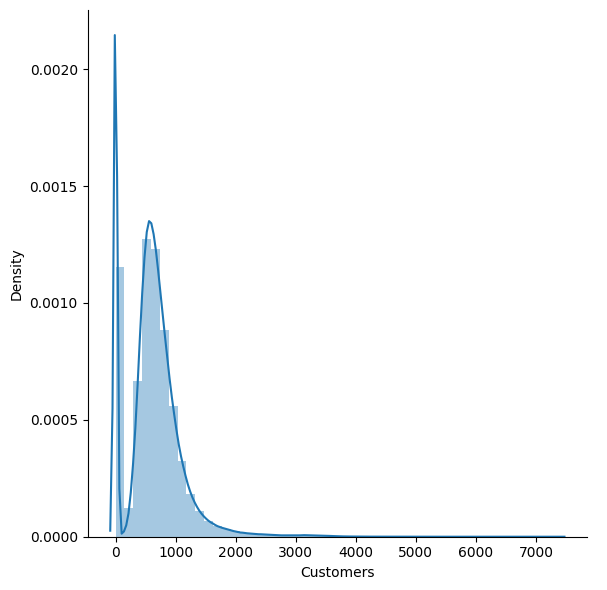

In [ ]:
for i in ["Sales","CompetitionDistance",'Customers']:
  
  
  sns.FacetGrid(Sales,size=6)\
    .map(sns.distplot,i)\
    .add_legend(); 
  
  plt.show()
  

### <font color='orange'>Insights</font>
* The `CompetitionDistance` is right skewed so we have to try transformation on this features
* Density of `Sales` at 0 is high this is because   some stores in the dataset were temporarily closed for refurbishment .




## Multivariated Analysis

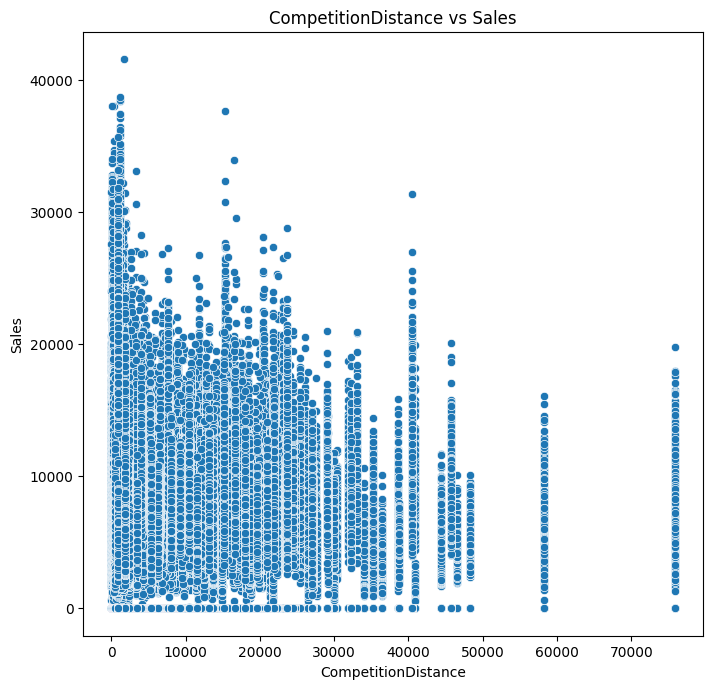

In [ ]:
sns.scatterplot(data=Sales,x="CompetitionDistance",y="Sales")
plt.title("CompetitionDistance vs Sales")
plt.show()

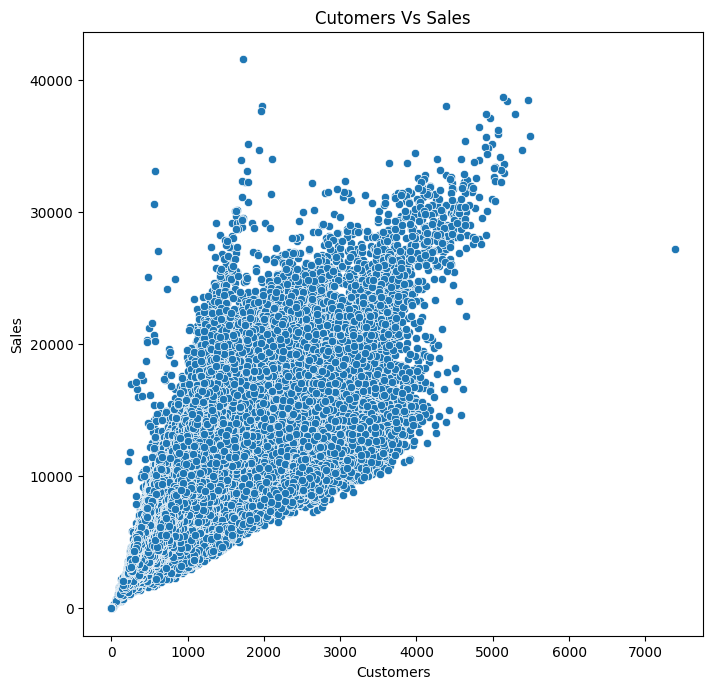

In [ ]:
sns.scatterplot(data=Sales,x="Customers",y="Sales")
plt.title("Cutomers Vs Sales")
plt.show()

### <font color='orange'>Insights</font>
* The competitor stores are closed to each other has more sales 
* We can see that `sales` are positively correlated with `customers `



### 3. Correlation Between Features 

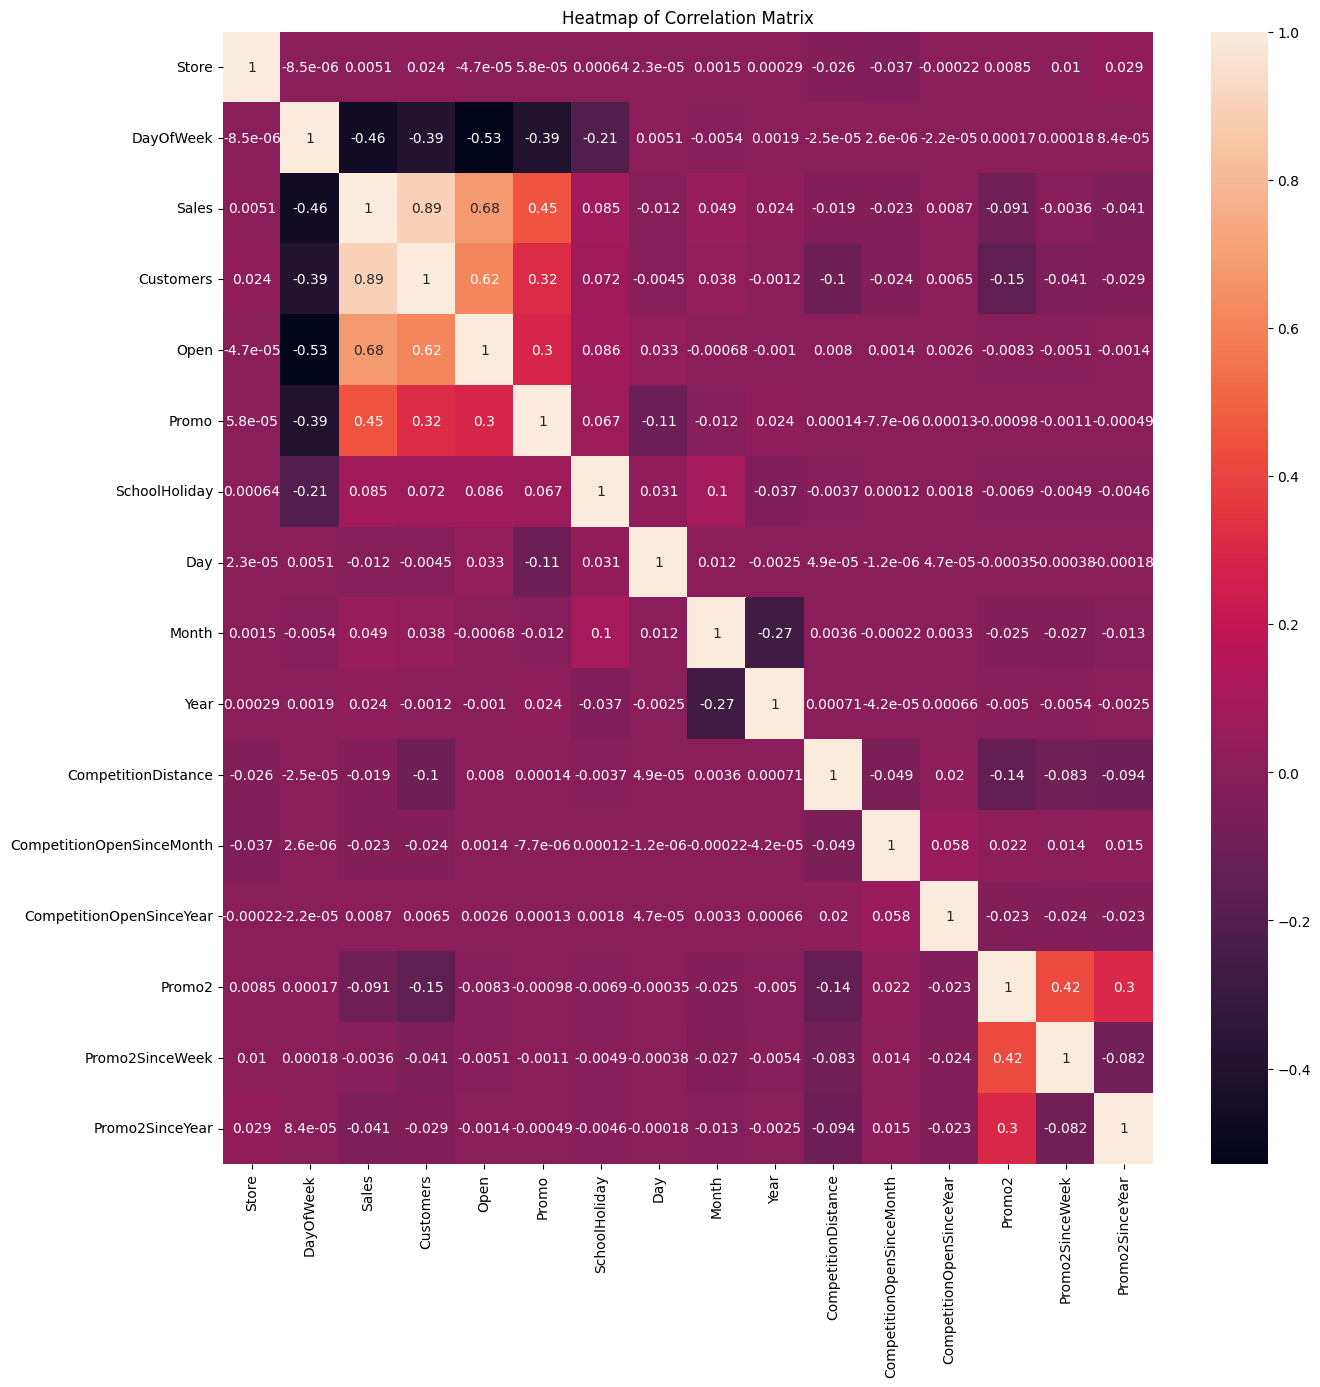

In [ ]:
# Increase figure size so it would be understandable
plt.figure(figsize = (15,15))

#correlation matrix
CM=Sales.corr() 
sns.heatmap(CM,annot=True) 
plt.title("Heatmap of Correlation Matrix") 
plt.show()

### <font color='orange'>Insights</font>
---
* `Customers,Sales,Open,Promo` are high and positively correlated with each other which is understandable
* Where `DayOFWeek` has negative correlation with this features
* `'Promo2', 'Promo2SinceWeek','Promo2SinceYear'` has some correlation with each other
---

##  <font color='Green'>C. Data Transformation </font>

####  1.  `Sales`

* 1st drop the rows which  contain data where the stores where closed for refurbishment

In [ ]:
Sales=Sales[Sales["Open"] !=0]
Sales=Sales.drop("Open",axis=1)

In [ ]:
# Check
Sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Day', 'Month', 'Year', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

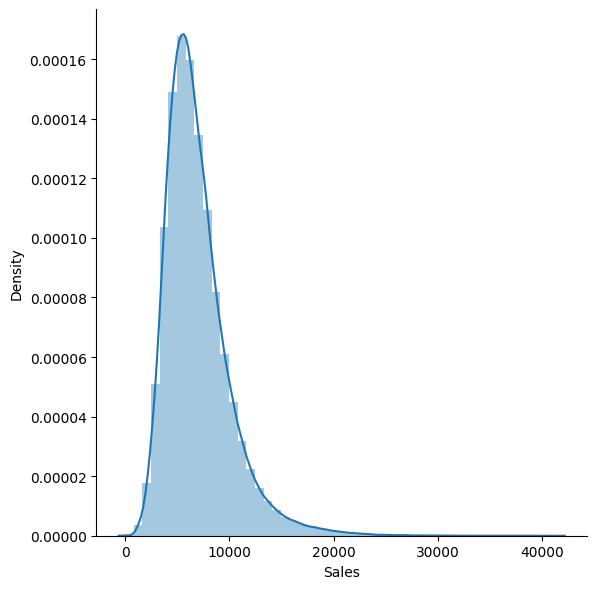

In [ ]:
sns.FacetGrid(Sales,size=6)\
  .map(sns.distplot,"Sales")\
  .add_legend(); 
  
plt.show()

* Now it seems to be similar to normal distribution

####  2. Apply log transformation to `CompetitionDistance`

Text(0.5, 1.0, 'Log-Transformed')

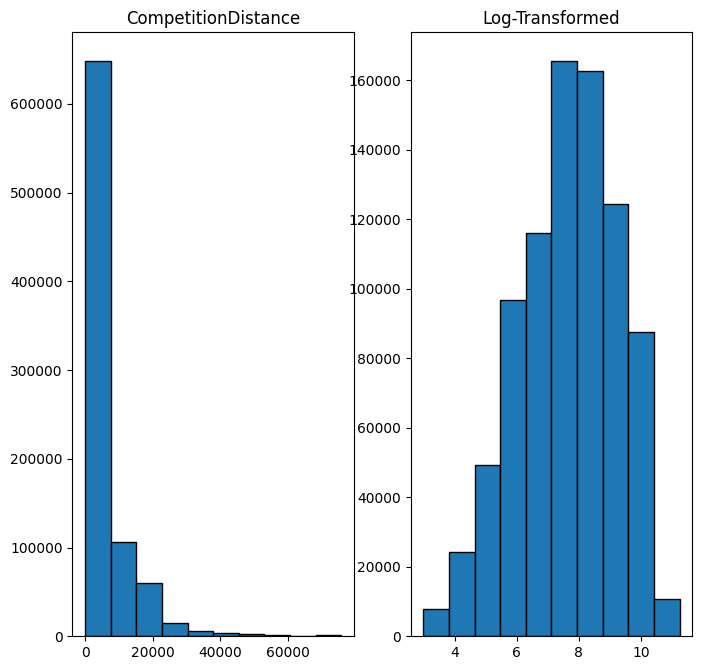

In [ ]:
# (https://www.statology.org/transform-data-in-python/)


#create log-transformed data
data_log = np.log(Sales["CompetitionDistance"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["CompetitionDistance"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('CompetitionDistance')
axs[1].set_title('Log-Transformed')


In [ ]:
Sales["CompetitionDistance"]= np.log(Sales["CompetitionDistance"])

####  2. Apply Square root transformation to `Customers`

Text(0.5, 1.0, 'SQRT transform')

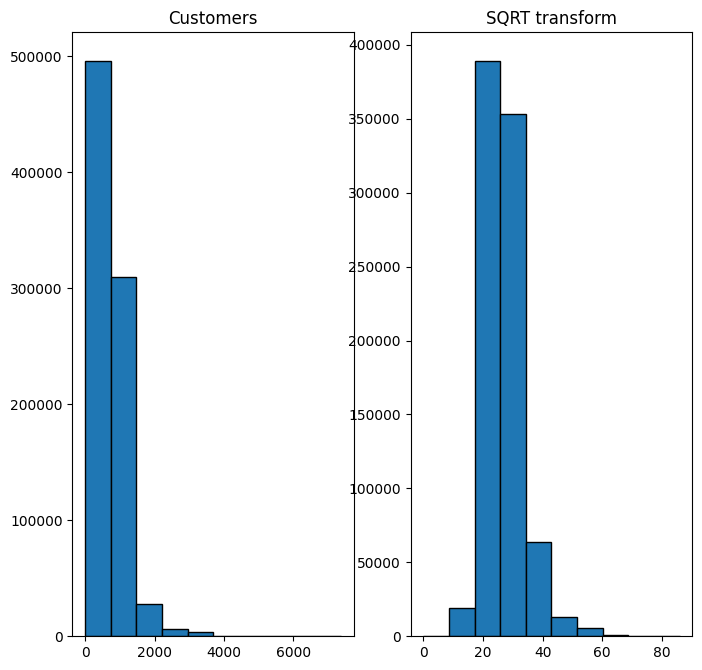

In [ ]:
#create log-transformed data
data_log = np.sqrt(Sales["Customers"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

# histograms
axs[0].hist(Sales["Customers"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#adding Title
axs[0].set_title('Customers')
axs[1].set_title('SQRT transform')


In [ ]:
Sales["Customers"]= np.sqrt(Sales["Customers"])

### Transformed Data

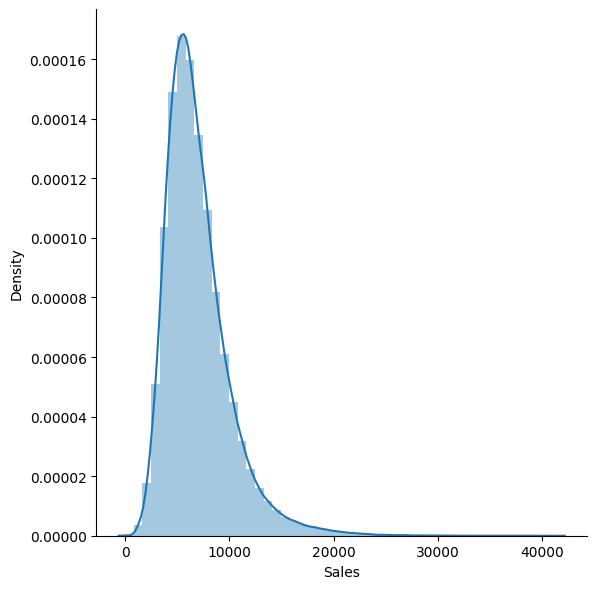

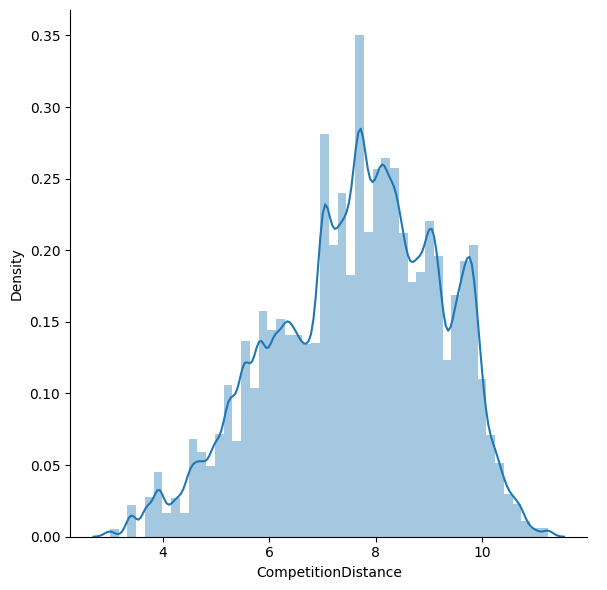

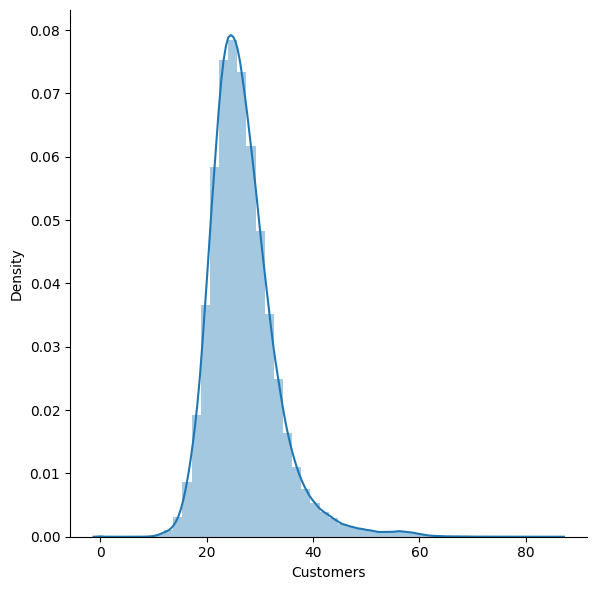

In [ ]:
for i in ["Sales","CompetitionDistance",'Customers']:
  
  
  sns.FacetGrid(Sales,size=6)\
    .map(sns.distplot,i)\
    .add_legend(); 
  
  
 

In [ ]:
for i in list(set(Sales.columns)-{"Store","Date","CompetitionDistance","Sales","Customers","CompetitionOpenSinceYear","Day","Promo2SinceWeek"}):
  print('\033[91m' , i , '\033[0m')
  print(Sales[i].value_counts())

 Assortment 
a    444909
c    391271
b      8212
Name: Assortment, dtype: int64
 Month 
1     86343
3     85980
7     85587
6     82576
4     81731
2     80243
5     80103
8     54413
10    53292
9     52330
11    51401
12    50393
Name: Month, dtype: int64
 Promo2SinceYear 
2011.0    518347
2013.0     91866
2014.0     65768
2012.0     60716
2009.0     53826
2010.0     46414
2015.0      7455
Name: Promo2SinceYear, dtype: int64
 StateHoliday 
0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64
 PromoInterval 
Jan,Apr,Jul,Oct     665718
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64
 Promo 
0    467496
1    376896
Name: Promo, dtype: int64
 SchoolHoliday 
0    680935
1    163457
Name: SchoolHoliday, dtype: int64
 Year 
2013    337943
2014    310417
2015    196032
Name: Year, dtype: int64
 CompetitionOpenSinceMonth 
9.0     364086
4.0      72256
11.0     70032
3.0      52685
7.0      49009
12.0     47887
10.0     46198


* Number of indivisual StateHoliday is so much less so giving them value 1 to convert them into binary features 

In [ ]:
Sales["StateHoliday"]= Sales["StateHoliday"].replace("a",1)
Sales["StateHoliday"]= Sales["StateHoliday"].replace("b",1)
Sales["StateHoliday"]= Sales["StateHoliday"].replace("c",1)
# Check
Sales["StateHoliday"].value_counts()

0    843482
1       910
Name: StateHoliday, dtype: int64

#### Outliers :

* Due to log transformation on  skewness has been reduced which will also reduce outliers effect on models
* There are some values of sales which were zero which are due to stores where closed which are removed

# Modeling

### factors affecting choosing the model
1. There are various factors such as time complexity, categorical features , numerical features , data ,outliers, noise which decide the best model to be used.
2. As there are many categorical features so the decision tree could work better in such case
3. decision Tree is highly interpretable which will helpful for feature importance
4. Here we go with linear regression models to understand which will work better.

### 1.Train-Test Split (Random Split)

In [ ]:
X=Sales[list(set(Sales.columns)-{"Sales","Date"})]
Y=Sales["Sales"]

In [ ]:
# To split the data with 20% of data in test
# (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2022)

### 2. Importing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### 3. One Hot Encoding

In [ ]:
Colm_OHE=['DayOfWeek', 'StoreType', 'Assortment',"PromoInterval"]

# Fitting Encoder 
encoder = OneHotEncoder(sparse=False)
# Creating columns of OHE only based on train data because of dataleakage
encoder.fit(x_train[Colm_OHE])
features = list(encoder.get_feature_names(Colm_OHE))

In [ ]:
# Train OHE
x_train[features] = encoder.transform(x_train[Colm_OHE])
x_train.drop(Colm_OHE,axis=1,inplace=True) # dropping Main Columns
# test
x_test[features] = encoder.transform(x_test[Colm_OHE])
x_test.drop(Colm_OHE,axis=1,inplace=True) # dropping Main Columns

* Standard Scalar

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


## Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
Ypred=regressor.predict(X_test)

In [ ]:
r2 = r2_score(y_test, Ypred)
print(r2)

0.8493173867067432


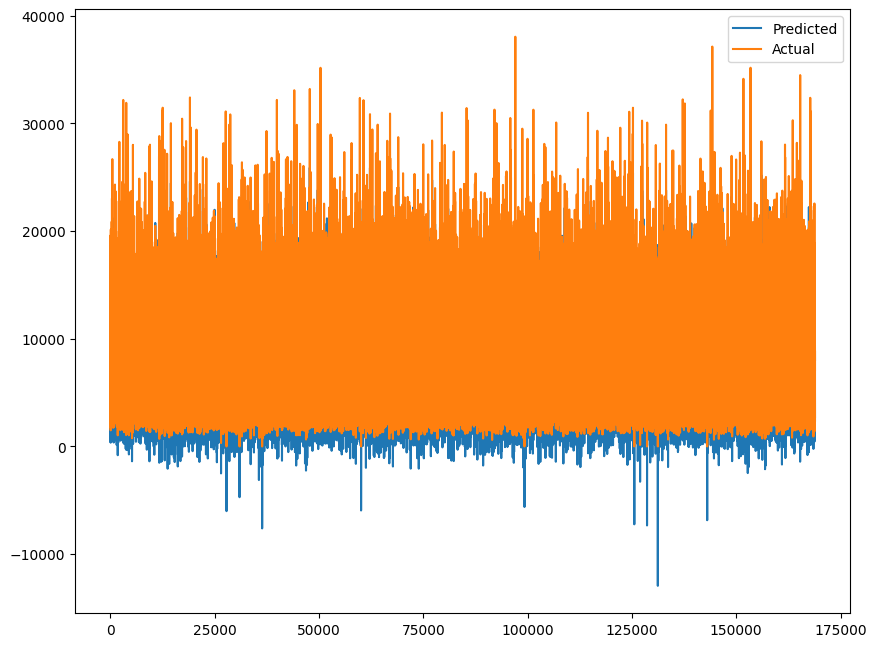

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(Ypred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## a) LASSO REGRESSION

In [ ]:
# Createing an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.8493260159205652 0.8491013254915128


In [ ]:
# Predicting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_lasso= r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)

0.8491013254915128


In [ ]:
# Checking the Performance on test set
r2_test_lasso= r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

0.8493260159205652


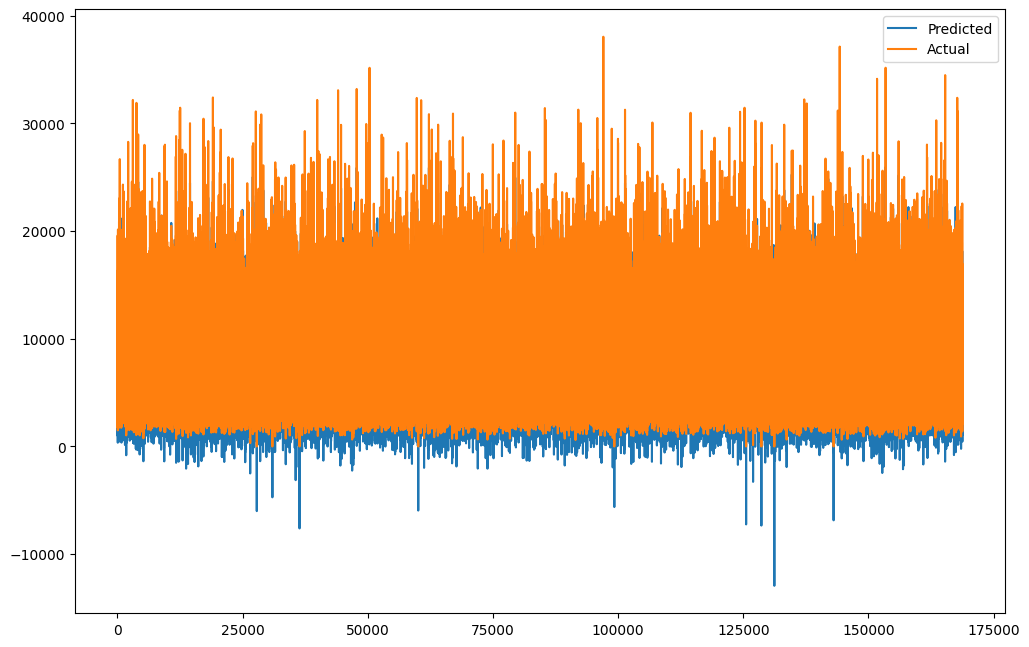

In [ ]:
# Plot 
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## b) RIDGE REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.01)
# Fitting the model
ridge.fit(X_train,y_train)
# check the score
ridge.score(X_train, y_train)

0.8491013254915456

In [ ]:
#Predict the X_train and X-test values
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(r2_train_ridge)

0.8491013254915456


In [ ]:
# Checking the Performance on test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

0.8493260159026395


## c) Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# DecisionTreeRefressor
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, y_train)

In [ ]:
#predict the X_train and X-test values
y_pred_train_d = Decision_tree.predict(X_train)
y_pred_test_d = Decision_tree.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_decision = r2_score(y_train, y_pred_train_d)
print(r2_train_decision)

1.0


In [ ]:
# Checking the Performance on test set
r2_test_decision= r2_score(y_test, y_pred_test_d)
print(r2_test_decision)

0.9512092814081475


## d) Decision Tree With Hyper Parameter Tuning

In [ ]:
Decision_tree1= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
Decision_tree_reg1 = Decision_tree1.fit(X_train, y_train)

In [ ]:
train_score = Decision_tree_reg1.score(X_train, y_train)
Test_Score = Decision_tree_reg1.score(X_test, y_test)
print(train_score)
print(Test_Score)

0.9774668257058196
0.9589562254573765


## e) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
#Random Forest with Parameters
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
# Making predictions on train and test data
y_pred_train_r = rdf.predict(X_train)
y_pred_test_r = rdf.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_random = r2_score(y_train, y_pred_train_r)
print(r2_train_random)

0.9971800020976976


In [ ]:
# Checking the Performance on test set
r2_test_random= r2_score(y_test, y_pred_test_r)
print(r2_test_random)

0.9834673049349769


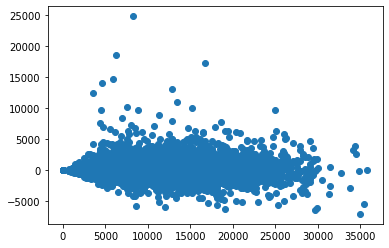

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.show()

# Observation

1. From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.
2. From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Plot between Promotion and Sales shows that promotion helps in increasing Sales.
4. Type of Store plays an important role in opening pattern of stores.
5. All Type ‘b’ stores never closed except for refurbishment or other reason.
6. All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.


# Conclusion

### 1. Rossmann Stores Data.csv dataset has 10,107,219 rows and 10 columns. store.csv dataset has 1115 rows and 9 columns. 
### 2. The sales in the month of December is the highest sales among others. 
### 3. The Promotion increases the sales so we should focus on that factor
### 4. As the customers are positively correlated with sales so we have to increase the frequecy of customers by offers 
### 5. The sales for store type B is higher than any other stores